# PART 1: POKEMON CARD PRICING ANALYSIS

---

## 1. Import Libraries and Load Data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style with minimal colors
sns.set_style('whitegrid')
sns.set_palette(['steelblue'])  # Single consistent color
plt.rcParams['figure.figsize'] = (14, 8)

%matplotlib inline

In [120]:
# Load the data
df = pd.read_csv('final_dataset.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Filter out Booster Box outliers
df = df[df['Rarity'] != 'Booster Box']

# Filter out Booster Pack/Box products from card names
df = df[~df['Card Name'].str.contains('Booster|Pack|Box', case=False, na=False)]

# Define price columns
price_cols = ['New', 'Used', 'Graded']



## 2. Price Distribution by Condition

## 3. Top 15 Most Valuable Pokemon Cards

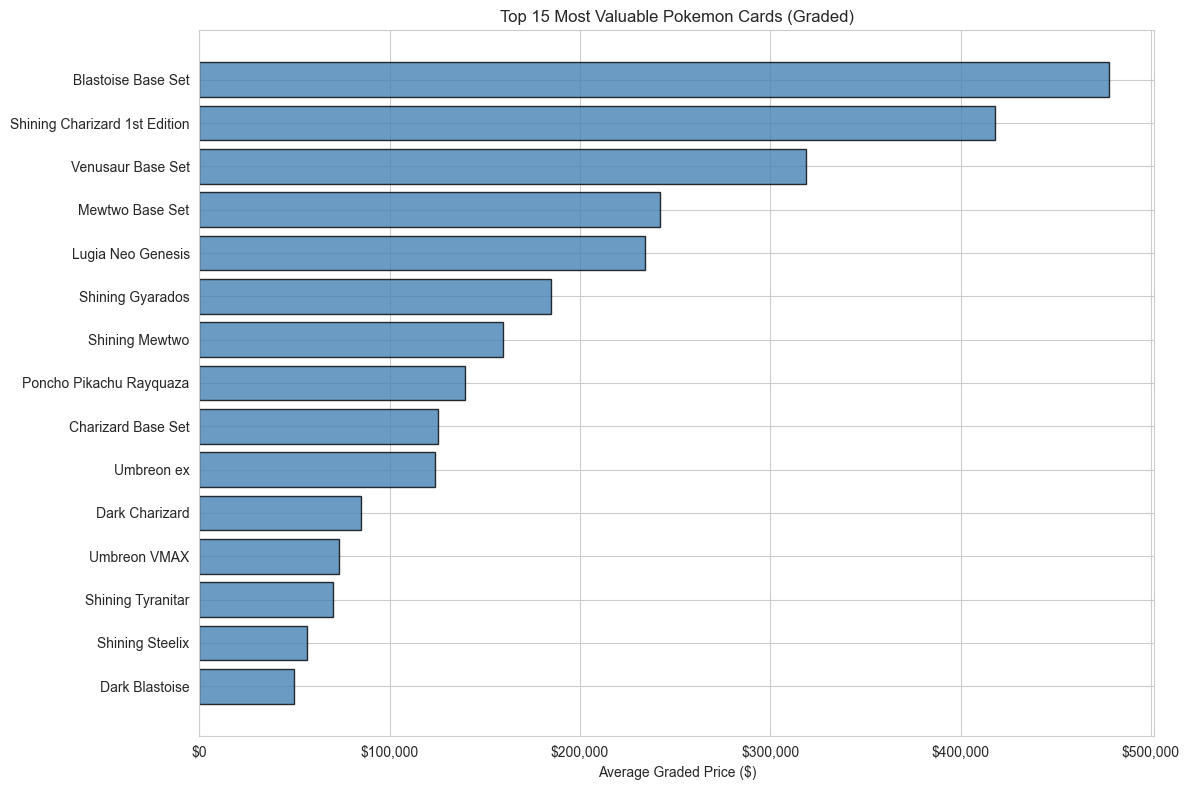

In [121]:
# Top 15 Most Valuable Cards (by Graded price only)
card_avg_prices = df[df['Graded'] > 0].groupby('Card Name')['Graded'].mean().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(range(len(card_avg_prices)), card_avg_prices.values, 
        alpha=0.8, edgecolor='black', color='steelblue')
ax.set_yticks(range(len(card_avg_prices)))
ax.set_yticklabels(card_avg_prices.index)
ax.set_xlabel('Average Graded Price ($)')
ax.set_title('Top 15 Most Valuable Pokemon Cards (Graded)')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

## 4. Top 10 Pokemon Sets by Average Graded Price

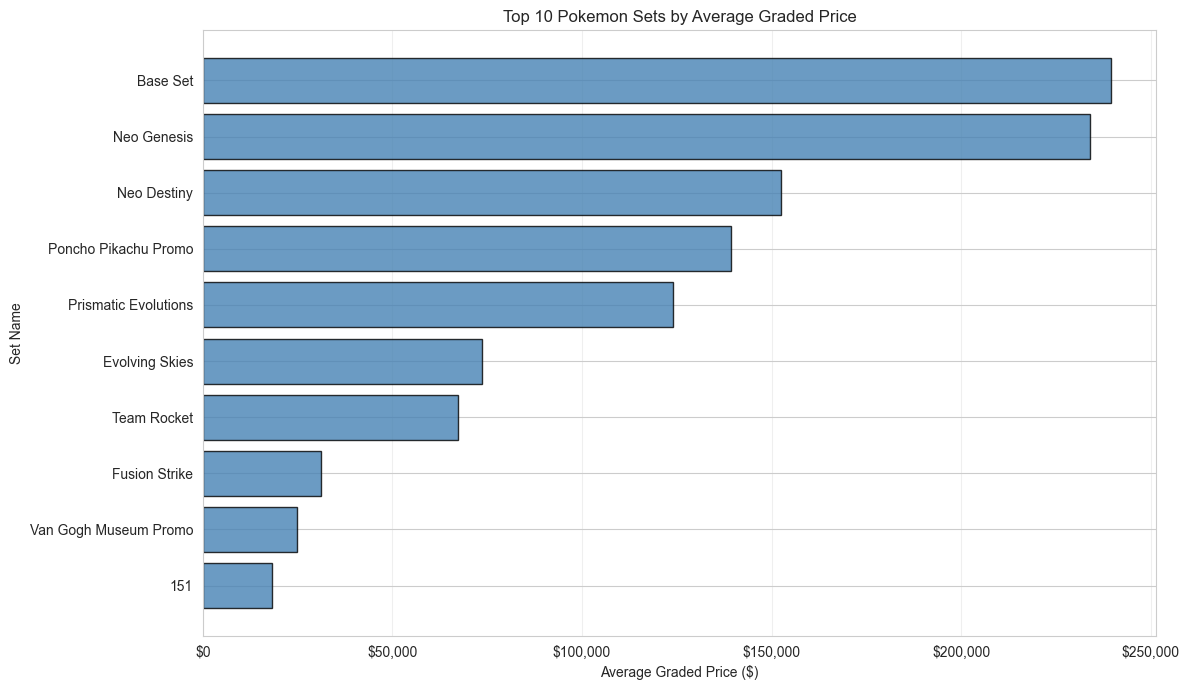

In [122]:
# Top 10 Sets by Average Graded Price
set_avg_prices = df[df['Graded'] > 0].groupby('Set Name')['Graded'].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(range(len(set_avg_prices)), set_avg_prices.values,
                color='steelblue', alpha=0.8, edgecolor='black')
ax.set_ylabel('Set Name')
ax.set_xlabel('Average Graded Price ($)')
ax.set_title('Top 10 Pokemon Sets by Average Graded Price')
ax.set_yticks(range(len(set_avg_prices)))
ax.set_yticklabels(set_avg_prices.index)
ax.invert_yaxis()  # Highest at top
ax.grid(axis='x', alpha=0.3)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


## 5. Price Distribution by Condition (Boxplot)

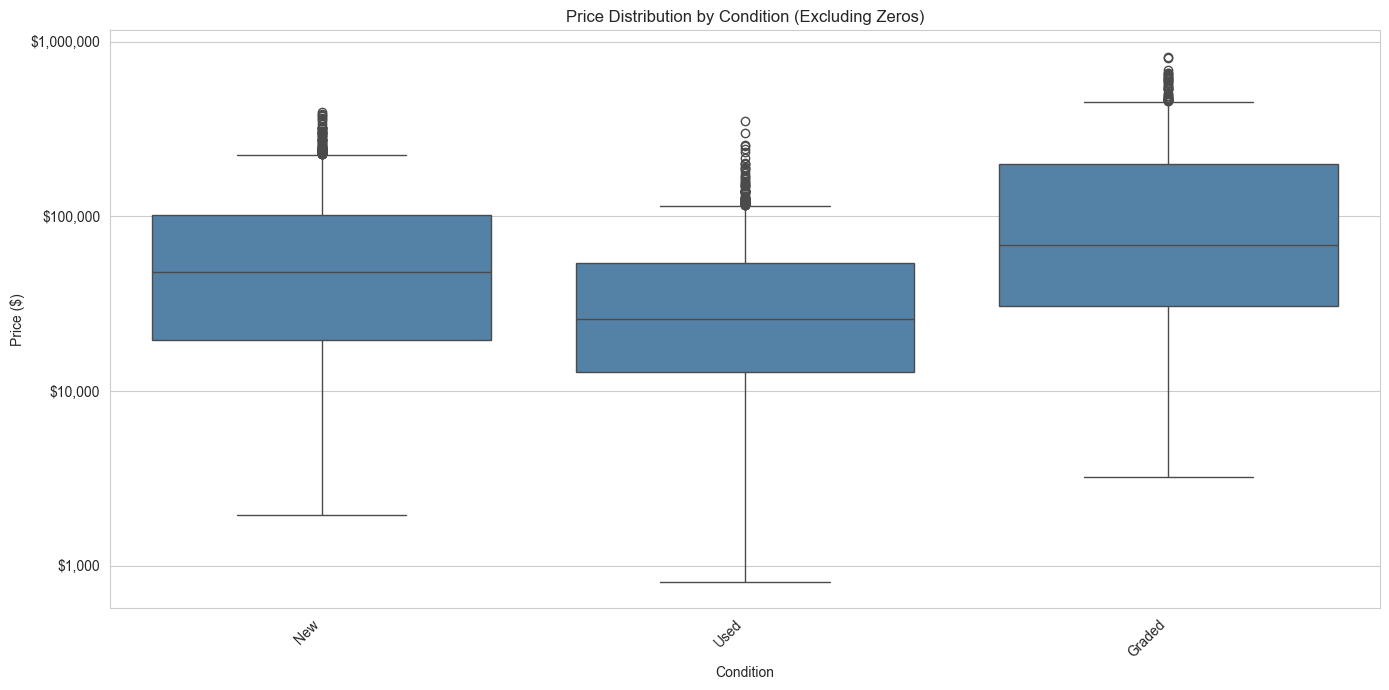

In [123]:
# Condition Comparison Boxplot
fig, ax = plt.subplots(figsize=(14, 7))

# Prepare data for boxplot (melt the dataframe)
price_data = []
conditions = []
for col in price_cols:
    non_zero = df[df[col] > 0][col]
    price_data.extend(non_zero.values)
    conditions.extend([col] * len(non_zero))

boxplot_df = pd.DataFrame({'Price': price_data, 'Condition': conditions})

sns.boxplot(data=boxplot_df, x='Condition', y='Price', ax=ax, color='steelblue')
ax.set_xlabel('Condition')
ax.set_ylabel('Price ($)')
ax.set_title('Price Distribution by Condition (Excluding Zeros)')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yscale('log')  # Log scale due to high variance
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

---
## Pokemon Card Growth Analysis
---

In [124]:
# Load Pokemon data
df_pk = pd.read_csv('final_dataset.csv')
df_pk['Date'] = pd.to_datetime(df_pk['Date'])

# Filter for graded prices and exclude booster products
df_pk = df_pk[df_pk['Graded'] > 0]
df_pk = df_pk[~df_pk['Card Name'].str.contains('Booster|Pack|Box', case=False, na=False)]

print(f"Total records: {len(df_pk):,}")
print(f"Unique cards: {df_pk['Card Name'].nunique()}")
print(f"Date range: {df_pk['Date'].min().strftime('%Y-%m')} to {df_pk['Date'].max().strftime('%Y-%m')}")

Total records: 1,160
Unique cards: 24
Date range: 2021-01 to 2025-10


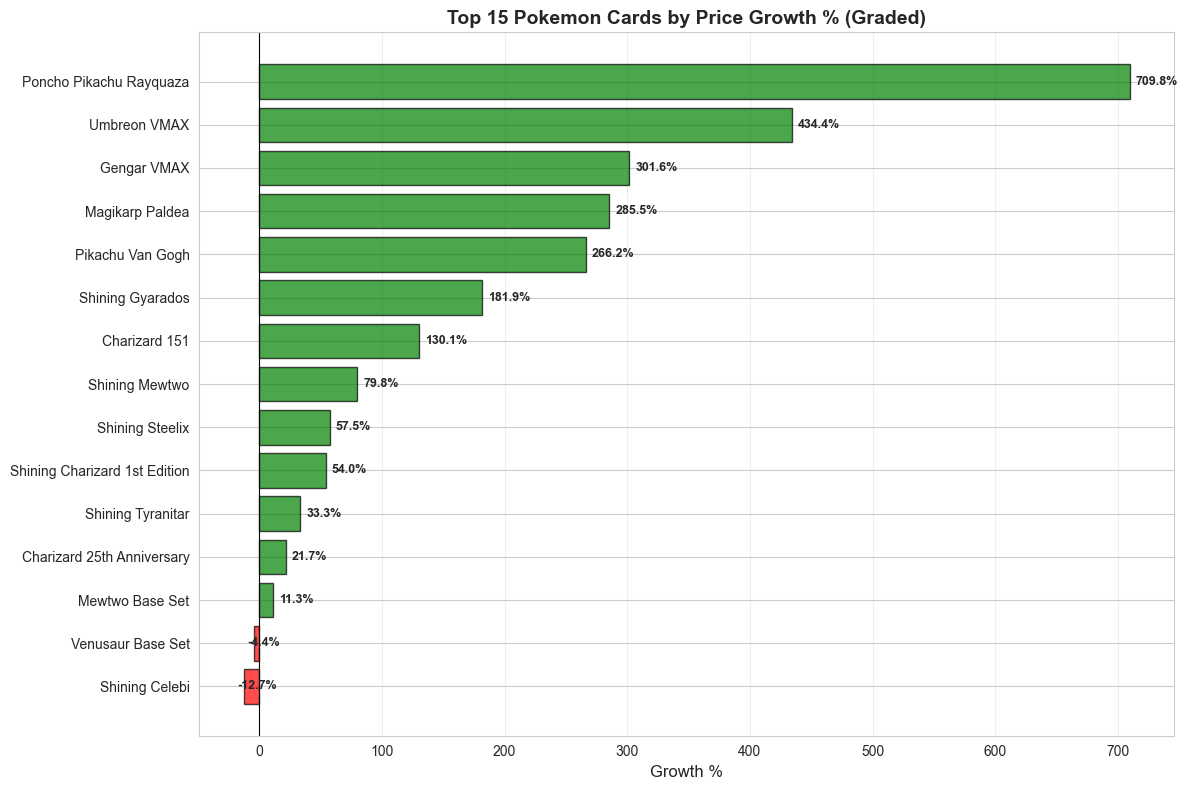

In [125]:
# Visualize top 15 growers
fig, ax = plt.subplots(figsize=(12, 8))

top_15 = pk_growth_df.head(15).sort_values('Growth %')
colors = ['green' if x > 0 else 'red' for x in top_15['Growth %']]

ax.barh(range(len(top_15)), top_15['Growth %'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Card'])
ax.set_xlabel('Growth %', fontsize=12)
ax.set_title('Top 15 Pokemon Cards by Price Growth % (Graded)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(top_15['Growth %']):
    ax.text(v + 5 if v > 0 else v - 5, i, f"{v:.1f}%", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

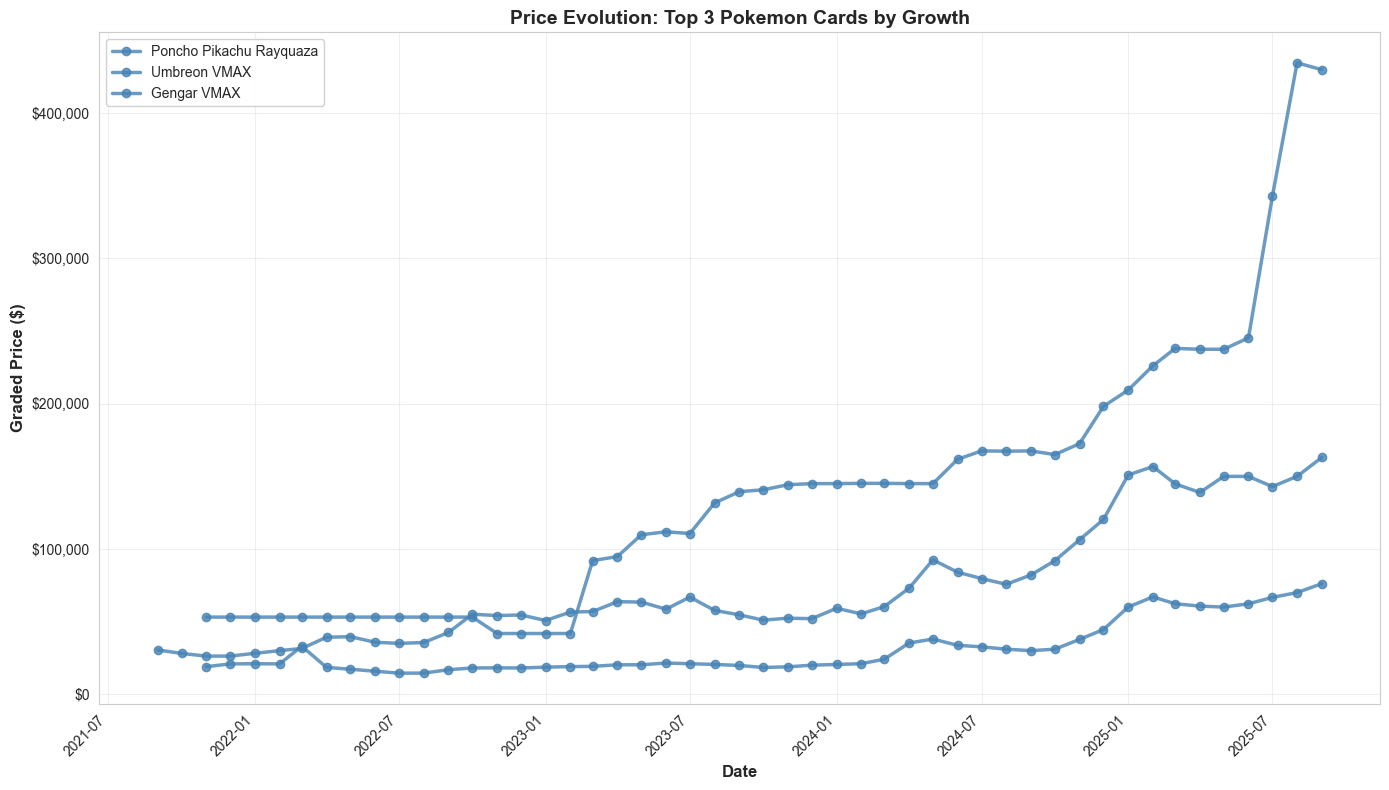

In [126]:
# Price Evolution Over Time - Top 3 Pokemon Cards
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 3 cards by growth
top_3_cards = pk_growth_df.head(3)['Card'].values

for idx, card in enumerate(top_3_cards):
    card_data = df_pk[df_pk['Card Name'] == card].sort_values('Date')
    ax.plot(card_data['Date'], card_data['Graded'], 
            marker='o', linewidth=2.5, markersize=6, 
            label=card, alpha=0.8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Graded Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Price Evolution: Top 3 Pokemon Cards by Growth', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


---

# PART 2: STAR WARS ACTION FIGURES ANALYSIS

---

In [127]:
# Load the data
df = pd.read_csv('starwars_filtered.csv')
print(f"Dataset loaded successfully!")
print(f"Total records: {len(df):,}")

Dataset loaded successfully!
Total records: 51,028


## Star Wars Price Distribution by Grading

## Top 10 Most Valuable Figures by Grading Status

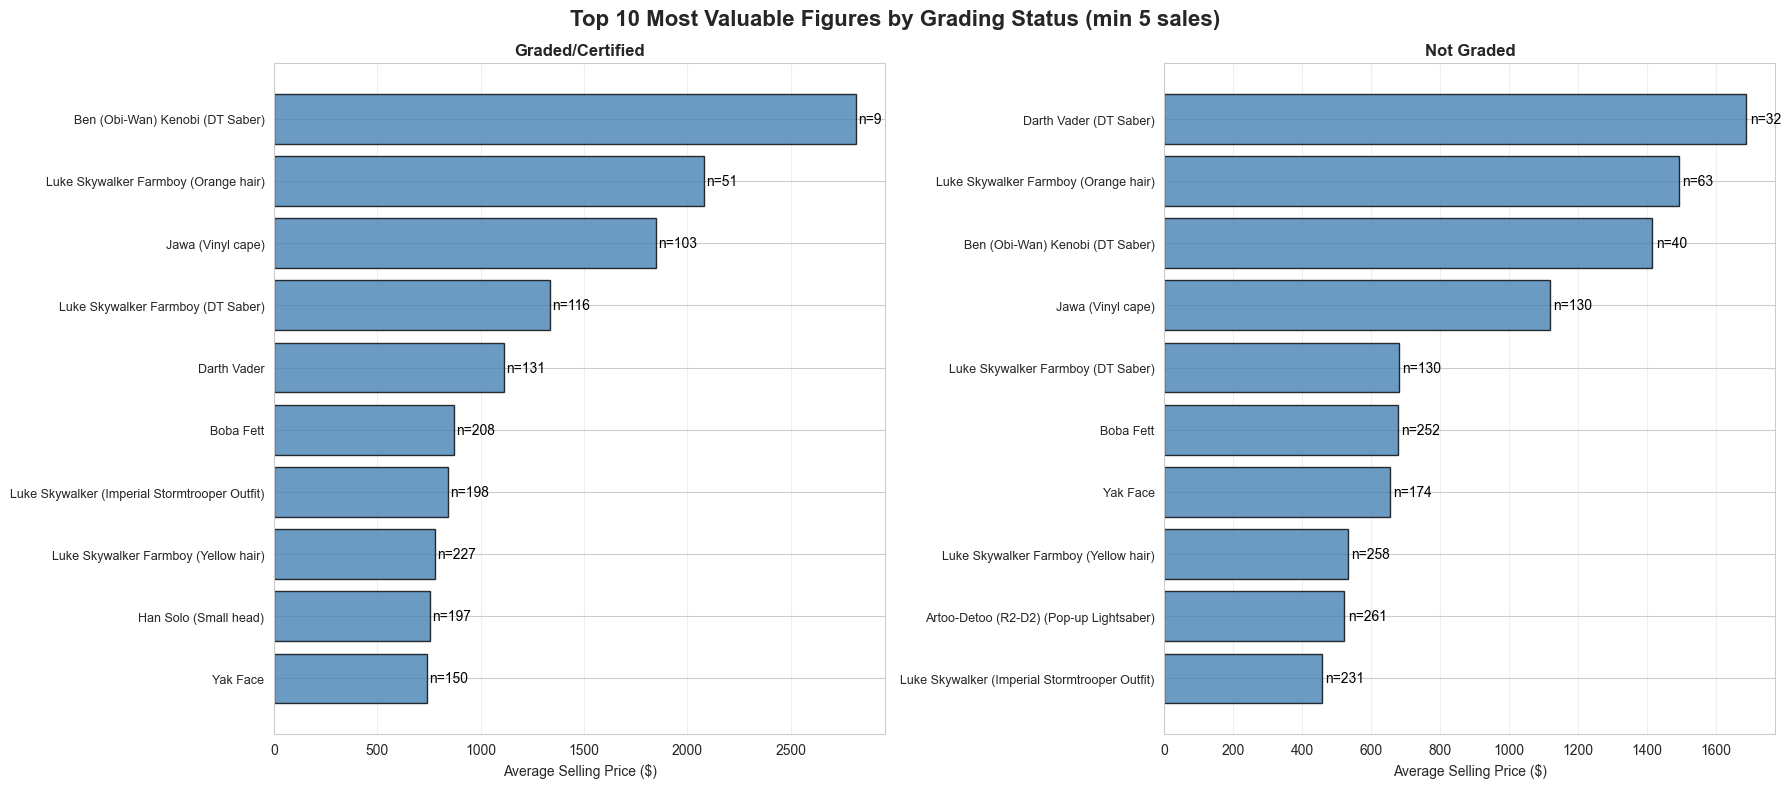

In [128]:
# Top 10 Most Valuable Figures by Grading Status
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0]),
    (0, 'Not Graded', axes[1])
]

for auth, title, ax in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by average price (with at least 5 sales for reliability)
    figure_stats = subset.groupby('figure').agg({
        'selling_price': ['mean', 'count']
    })
    figure_stats.columns = ['avg_price', 'count']
    figure_stats = figure_stats[figure_stats['count'] >= 5]  # At least 5 sales
    top_10 = figure_stats.nlargest(10, 'avg_price')
    
    # Plot
    y_pos = np.arange(len(top_10))
    ax.barh(y_pos, top_10['avg_price'], color='steelblue', alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_10.index, fontsize=9)
    ax.set_xlabel('Average Selling Price ($)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add count annotations
    for i, (idx, row) in enumerate(top_10.iterrows()):
        ax.text(row['avg_price'] + 10, i, f"n={int(row['count'])}", 
                va='center', fontsize=10, color='black')

fig.suptitle('Top 10 Most Valuable Figures by Grading Status (min 5 sales)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Top 10 Best Selling Figures by Grading Status

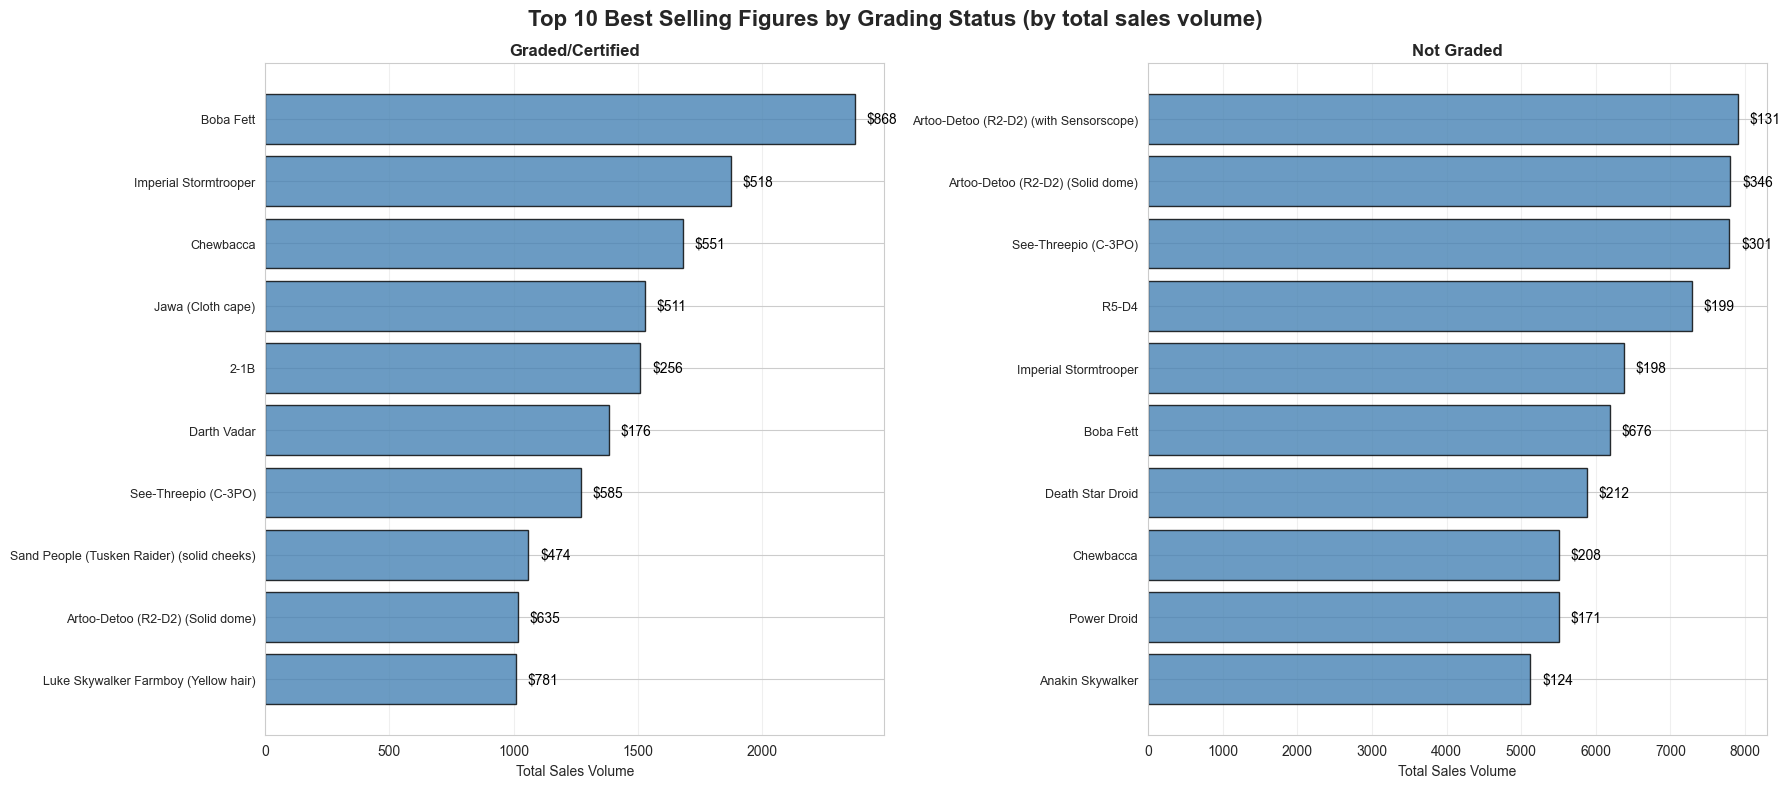

In [129]:
# Top 10 Best Selling Figures by Grading Status (by total sales volume)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0]),
    (0, 'Not Graded', axes[1])
]

for auth, title, ax in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by SUMMING the 'sales' column (actual sales volume)
    figure_sales = subset.groupby('figure')['sales'].sum().sort_values(ascending=False).head(10)
    
    # Get average price for each of these top figures
    avg_prices = []
    for figure in figure_sales.index:
        avg_price = subset[subset['figure'] == figure]['selling_price'].mean()
        avg_prices.append(avg_price)
    
    # Create dataframe for plotting
    plot_data = pd.DataFrame({
        'figure': figure_sales.index,
        'total_sales': figure_sales.values,
        'avg_price': avg_prices
    })
    
    # Plot
    y_pos = np.arange(len(plot_data))
    bars = ax.barh(y_pos, plot_data['total_sales'], color='steelblue', alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(plot_data['figure'], fontsize=9)
    ax.set_xlabel('Total Sales Volume', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add average price annotations
    for i, (idx, row) in enumerate(plot_data.iterrows()):
        ax.text(row['total_sales'] + max(plot_data['total_sales'])*0.02, i, 
                f"${row['avg_price']:.0f}", 
                va='center', fontsize=10, color='black', fontweight='normal')

fig.suptitle('Top 10 Best Selling Figures by Grading Status (by total sales volume)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

---
## Star Wars Figure Growth Analysis
---

In [130]:
# Load Star Wars data
df_sw = pd.read_csv('starwars_filtered.csv')

# Filter for authentic (graded) figures only
df_sw = df_sw[df_sw['authenticity_n'] == 1]
df_sw = df_sw[df_sw['selling_price'] > 0]

print(f"Total records: {len(df_sw):,}")
print(f"Unique figures: {df_sw['figure'].nunique()}")
print(f"Year range: {df_sw['year'].min()} to {df_sw['year'].max()}")

Total records: 22,697
Unique figures: 121
Year range: 2009 to 2025


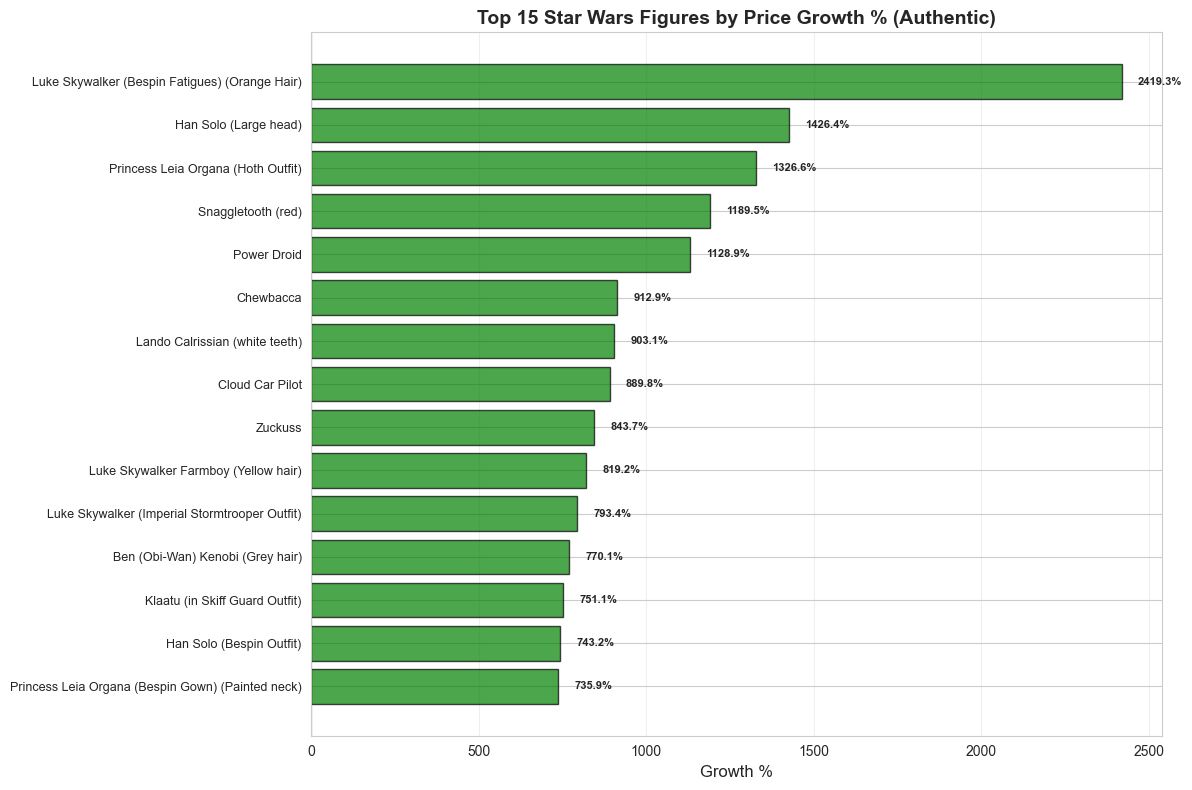

In [131]:
# Visualize top 15 growers
fig, ax = plt.subplots(figsize=(12, 8))

top_15_sw = sw_growth_df.head(15).sort_values('Growth %')
colors = ['green' if x > 0 else 'red' for x in top_15_sw['Growth %']]

ax.barh(range(len(top_15_sw)), top_15_sw['Growth %'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_15_sw)))
ax.set_yticklabels(top_15_sw['Figure'], fontsize=9)
ax.set_xlabel('Growth %', fontsize=12)
ax.set_title('Top 15 Star Wars Figures by Price Growth % (Authentic)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(top_15_sw['Growth %']):
    ax.text(v + max(top_15_sw['Growth %'])*0.02 if v > 0 else v - max(top_15_sw['Growth %'])*0.02, 
            i, f"{v:.1f}%", va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

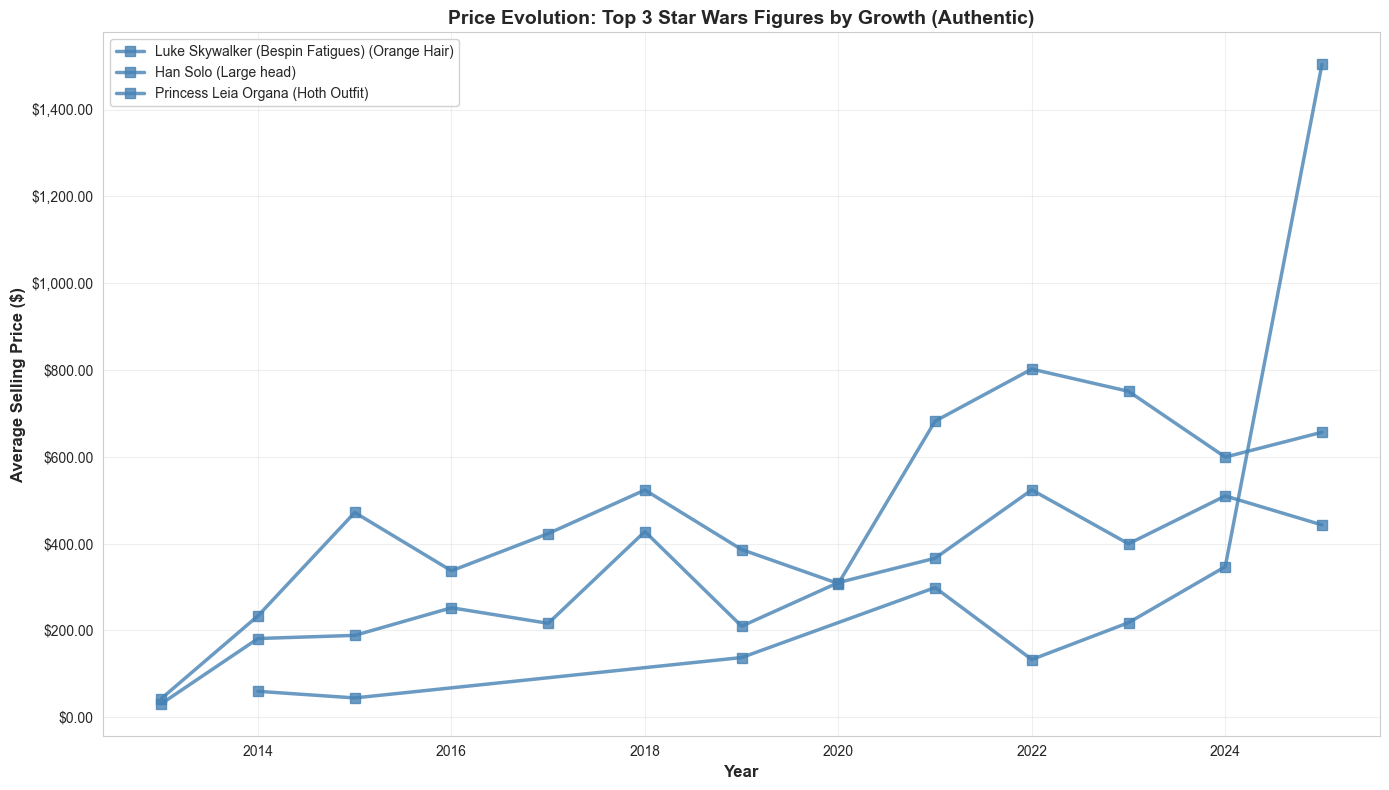

In [132]:
# Price Evolution Over Time - Top 3 Star Wars Figures
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 3 figures by growth
top_3_figures = sw_growth_df.head(3)['Figure'].values

for idx, figure in enumerate(top_3_figures):
    figure_data = df_sw[df_sw['figure'] == figure].groupby('year')['selling_price'].mean().reset_index()
    ax.plot(figure_data['year'], figure_data['selling_price'], 
            marker='s', linewidth=2.5, markersize=7, 
            label=figure, alpha=0.8)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Selling Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Price Evolution: Top 3 Star Wars Figures by Growth (Authentic)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.2f}'))

plt.tight_layout()
plt.show()